In [2]:
import csv
import os
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as sts
import numpy as np
# %matplotlib notebook

In [3]:
csvdata = 'Food_Access_USDA.csv'
df = pd.read_csv(csvdata)
df.shape

(948, 46)

In [4]:
# Low income vs non low income
low_income_df = df[{"GEOID10","NAME10","PLNG_REGION","Urban","LowIncomeTracts","lalowihalf","lalowihalfshare","lalowi1","lalowi1share","GlobalID","lapop1","POP2010","lakids1","laseniors1"}]
low_income_df=low_income_df.rename(columns={"PLNG_REGION": "Metro_Atlanta", 
                                            "GlobalID": "Global_ID",
                                            "LowIncomeTracts": "Income_Level", 
                                            "lalowihalf": "LowAcces_LowIncome.5miles", 
                                            "lalowi1share": "LowAccess_LowIncome1mile%", 
                                            "lalowihalfshare": "LowAccess_LowIncome.5miles%", 
                                            "lalowi1": "LowAccess_LowIncome1mile", 
                                            "GEOID10": "Geo_ID", 
                                            "NAME10": "Name",
                                            "lakids1": "LowAccess_Kids1Mile",
                                            "laseniors1":"LowAccess_Seniors1Mile",
                                            "lapop1":"LowAccess_1Mile",
                                            "POP2010": "Total_Pop"})
# Drop stuff from dataframe
# This drops all 0 values from "Urban"
low_income_df = low_income_df.loc[(low_income_df["Urban"] != 0) & (low_income_df["Metro_Atlanta"] == "ARC 10")]
low_income_df
# Change values in dataframe
# for col in low_income_df.columns():
low_income_df.loc[low_income_df["Income_Level"] == 0, "Income_Level"] = "Not Low Income"
low_income_df.loc[low_income_df["Income_Level"] == 1, "Income_Level"] = "Low Income" 

# low_income_df.Income_Level = low_income_df.Income_Level.map({ 0 : "Not Low Income", 1 : "Low Income"})

# low_income_df.replace({'Income_Level':{0:"Not Low Income",1:"Low Income"}},inplace=True)
low_income_df
df_high=low_income_df[(low_income_df["Income_Level"] == "Not Low Income")]
df_low=low_income_df[(low_income_df["Income_Level"] == "Low Income")]

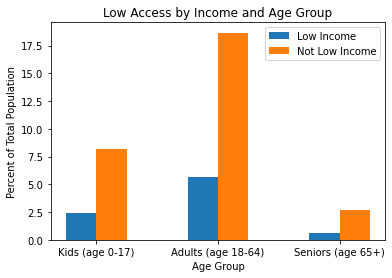

Total Population: 3,907,025
Total Low Access Population: 1,493,967


,"Low Access, Low Income (% of Pop.)","Low Access, Not Low Income (% of Pop.)"
Kids (age 0-17),2.45,8.22
Adults (age 18-64),5.66,18.66
Seniors (age 65+),0.59,2.66


In [6]:
total_pop=low_income_df['Total_Pop'].sum()
total_la=(df_low["LowAccess_1Mile"].sum()/total_pop)*100
total_la2=(df_high["LowAccess_1Mile"].sum()/total_pop)*100
kids_pop=(df_low["LowAccess_Kids1Mile"].sum()/total_pop)*100
kids_pop2=(df_high["LowAccess_Kids1Mile"].sum()/total_pop)*100
seniors_pop=(df_low["LowAccess_Seniors1Mile"].sum()/total_pop)*100
seniors_pop2=(df_high["LowAccess_Seniors1Mile"].sum()/total_pop)*100
adult_pop=total_la-kids_pop-seniors_pop
adult_pop2=total_la2-kids_pop2-seniors_pop2

y1=[kids_pop,adult_pop,seniors_pop]
y2=[kids_pop2,adult_pop2,seniors_pop2]

barWidth = 0.25
xpos1 = np.arange(len(y1))
xpos2 = [x + barWidth for x in xpos1]

plt.bar(xpos1,y1, width=barWidth, label = "Low Income")
plt.bar(xpos2,y2, width=barWidth, label = "Not Low Income")
xgroups=["Kids (age 0-17)","Adults (age 18-64)","Seniors (age 65+)"]

plt.title("Low Access by Income and Age Group")
plt.xlabel("Age Group")
plt.xticks([r + (barWidth/2) for r in range(len(y1))], xgroups)
plt.ylabel("Percent of Total Population")
plt.legend()
plt.show()
age_table=pd.DataFrame({"Low Access, Low Income (% of Pop.)": map(lambda n: "%.2f" % n,y1),
                        "Low Access, Not Low Income (% of Pop.)":map(lambda n: "%.2f" % n,y2)},
                      index=xgroups)
print(f"Total Population: {total_pop:,}")
print(f"Total Low Access Population: {low_income_df['LowAccess_1Mile'].sum():,.0f}")
age_table

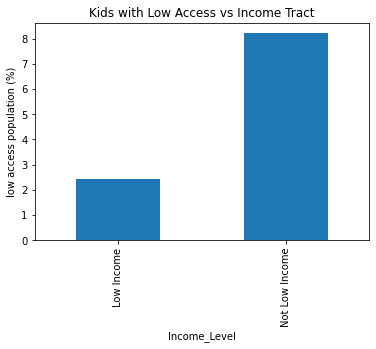

In [39]:
kids_df=low_income_df.copy()
kids_df.loc[seniors_df['Income_Level'] == 0, 'LowIncomeTracts'] = 'Not Low Income'
kids_df.loc[seniors_df['Income_Level'] == 1, 'LowIncomeTracts'] = 'Low Income'
income_groups = seniors_df.groupby('Income_Level')

lowincome_sum = income_groups['LowAccess_1Mile'].sum()
seniors_sum = (income_groups['LowAccess_Kids1Mile'].sum()/(total_pop))*100
seniors_sum.plot(kind= 'bar', ylabel= 'low access population (%)', title= 'Kids with Low Access vs Income Tract')
plt.show()

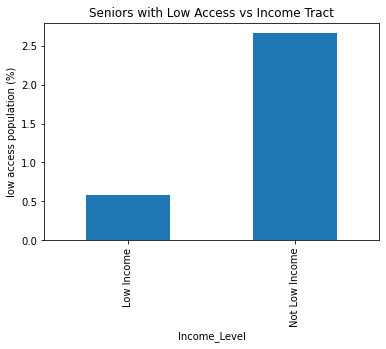

In [40]:
seniors_df=low_income_df.copy()
seniors_df.loc[seniors_df['Income_Level'] == 0, 'LowIncomeTracts'] = 'Not Low Income'
seniors_df.loc[seniors_df['Income_Level'] == 1, 'LowIncomeTracts'] = 'Low Income'
income_groups = seniors_df.groupby('Income_Level')

lowincome_sum = income_groups['LowAccess_1Mile'].sum()
seniors_sum = (income_groups['LowAccess_Seniors1Mile'].sum()/(total_pop))*100
seniors_sum.plot(kind= 'bar', ylabel= 'low access population (%)', title= 'Seniors with Low Access vs Income Tract')
plt.show()

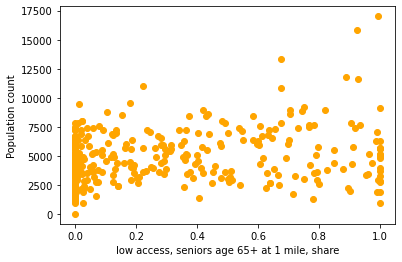

In [41]:

df.loc[(df['PLNG_REGION'] == 'ARC 10') & (df['Urban'] == 1)]

seniors_df = df[{'POP2010', 'PLNG_REGION', 'Urban', 'laseniorshalf', 'laseniorshalfshare','laseniors1','laseniors1share','GlobalID','lalowi1','lalowi1share','lapop1','lapop1share', 'LowIncomeTracts' }]

seniors_df_low = seniors_df[(df['LowIncomeTracts'] == 1)]
seniors_df_high = seniors_df[(df['LowIncomeTracts'] == 0)]

x_low = seniors_df_low['laseniors1share']
y_low = seniors_df_low['POP2010']

seniorsplt = plt.scatter(x_low, y_low, color = 'orange')
plt.xlabel('low access, seniors age 65+ at 1 mile, share')
plt.ylabel('Population count')
plt.show()